<a href="https://colab.research.google.com/github/sahilfatima/Housing_schema/blob/main/Housing_Schema.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
#Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.ensemble import RandomForestRegressor

In [4]:
#Getting Dataset
df = pd.read_csv("/content/sample_data/california_housing_test.csv")
df.info()
df.describe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           3000 non-null   float64
 1   latitude            3000 non-null   float64
 2   housing_median_age  3000 non-null   float64
 3   total_rooms         3000 non-null   float64
 4   total_bedrooms      3000 non-null   float64
 5   population          3000 non-null   float64
 6   households          3000 non-null   float64
 7   median_income       3000 non-null   float64
 8   median_house_value  3000 non-null   float64
dtypes: float64(9)
memory usage: 211.1 KB


<bound method NDFrame.describe of       longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0       -122.05     37.37                27.0       3885.0           661.0   
1       -118.30     34.26                43.0       1510.0           310.0   
2       -117.81     33.78                27.0       3589.0           507.0   
3       -118.36     33.82                28.0         67.0            15.0   
4       -119.67     36.33                19.0       1241.0           244.0   
...         ...       ...                 ...          ...             ...   
2995    -119.86     34.42                23.0       1450.0           642.0   
2996    -118.14     34.06                27.0       5257.0          1082.0   
2997    -119.70     36.30                10.0        956.0           201.0   
2998    -117.12     34.10                40.0         96.0            14.0   
2999    -119.63     34.42                42.0       1765.0           263.0   

      population  households  median_income  median_house_value  
0         1537.0       606.0         6.6085            344700.0  
1          809.0       277.0         3.5990            176500.0  
2         1484.0       495.0         5.7934            270500.0  
3           49.0        11.0         6.1359            330000.0  
4          850.0       237.0         2.9375             81700.0  
...          ...         ...            ...                 ...  
2995      1258.0       607.0         1.1790            225000.0  
2996      3496.0      1036.0         3.3906            237200.0  
2997       693.0       220.0         2.2895             62000.0  
2998        46.0        14.0         3.2708            162500.0  
2999       753.0       260.0         8.5608            500001.0  

[3000 rows x 9 columns]>

In [5]:
df.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
dtype: int64

In [6]:
df.head(5)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.05,37.37,27.0,3885.0,661.0,1537.0,606.0,6.6085,344700.0
1,-118.30,34.26,43.0,1510.0,310.0,809.0,277.0,3.5990,176500.0
2,-117.81,33.78,27.0,3589.0,507.0,1484.0,495.0,5.7934,270500.0
3,-118.36,33.82,28.0,67.0,15.0,49.0,11.0,6.1359,330000.0
4,-119.67,36.33,19.0,1241.0,244.0,850.0,237.0,2.9375,81700.0


In [7]:
mean = df.mean
print(mean)

<bound method NDFrame._add_numeric_operations.<locals>.mean of       longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0       -122.05     37.37                27.0       3885.0           661.0   
1       -118.30     34.26                43.0       1510.0           310.0   
2       -117.81     33.78                27.0       3589.0           507.0   
3       -118.36     33.82                28.0         67.0            15.0   
4       -119.67     36.33                19.0       1241.0           244.0   
...         ...       ...                 ...          ...             ...   
2995    -119.86     34.42                23.0       1450.0           642.0   
2996    -118.14     34.06                27.0       5257.0          1082.0   
2997    -119.70     36.30                10.0        956.0           201.0   
2998    -117.12     34.10                40.0         96.0            14.0   
2999    -119.63     34.42                42.0       1765.0           263.0   



In [8]:
median = df.median
print(median)

<bound method NDFrame._add_numeric_operations.<locals>.median of       longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0       -122.05     37.37                27.0       3885.0           661.0   
1       -118.30     34.26                43.0       1510.0           310.0   
2       -117.81     33.78                27.0       3589.0           507.0   
3       -118.36     33.82                28.0         67.0            15.0   
4       -119.67     36.33                19.0       1241.0           244.0   
...         ...       ...                 ...          ...             ...   
2995    -119.86     34.42                23.0       1450.0           642.0   
2996    -118.14     34.06                27.0       5257.0          1082.0   
2997    -119.70     36.30                10.0        956.0           201.0   
2998    -117.12     34.10                40.0         96.0            14.0   
2999    -119.63     34.42                42.0       1765.0           263.0   

In [9]:
mode = df.mode
print(mode)

<bound method DataFrame.mode of       longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0       -122.05     37.37                27.0       3885.0           661.0   
1       -118.30     34.26                43.0       1510.0           310.0   
2       -117.81     33.78                27.0       3589.0           507.0   
3       -118.36     33.82                28.0         67.0            15.0   
4       -119.67     36.33                19.0       1241.0           244.0   
...         ...       ...                 ...          ...             ...   
2995    -119.86     34.42                23.0       1450.0           642.0   
2996    -118.14     34.06                27.0       5257.0          1082.0   
2997    -119.70     36.30                10.0        956.0           201.0   
2998    -117.12     34.10                40.0         96.0            14.0   
2999    -119.63     34.42                42.0       1765.0           263.0   

      population  households  m

In [12]:
df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value'],
      dtype='object')

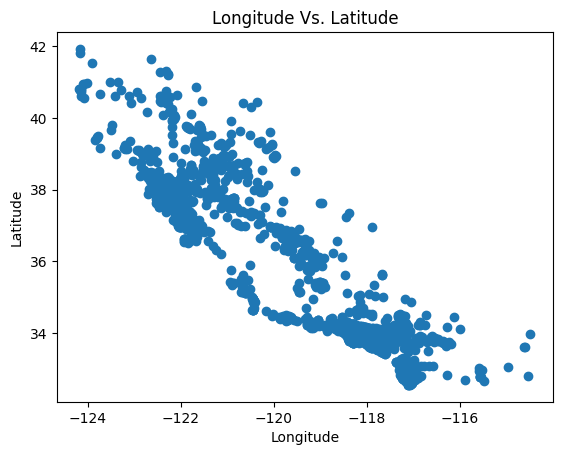

In [16]:
plt.scatter(df["longitude"], df["latitude"])
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Longitude Vs. Latitude")
plt.show()

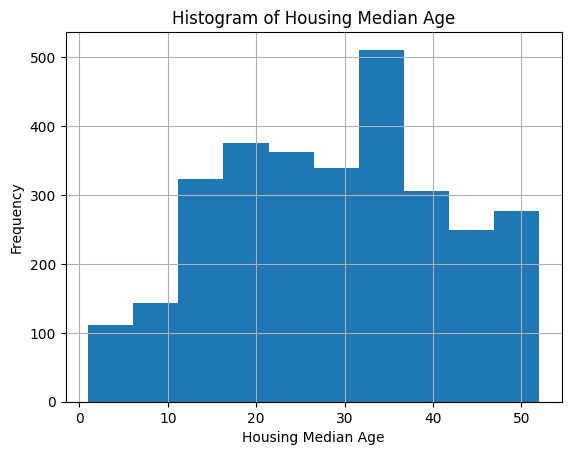

In [17]:
df["housing_median_age"].hist()
plt.xlabel("Housing Median Age")
plt.ylabel("Frequency")
plt.title("Histogram of Housing Median Age")
plt.show()

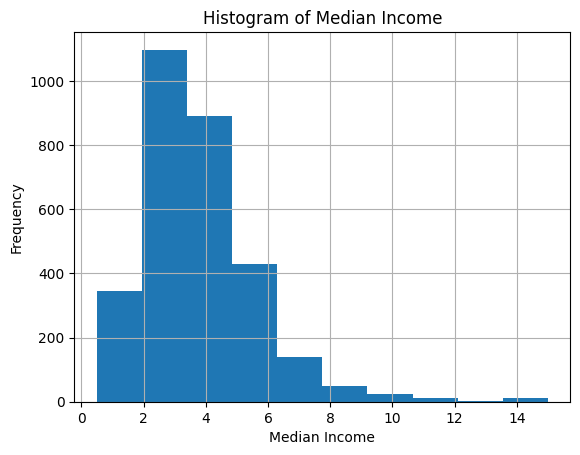

In [18]:
df["median_income"].hist()
plt.xlabel("Median Income")
plt.ylabel("Frequency")
plt.title("Histogram of Median Income")
plt.show()

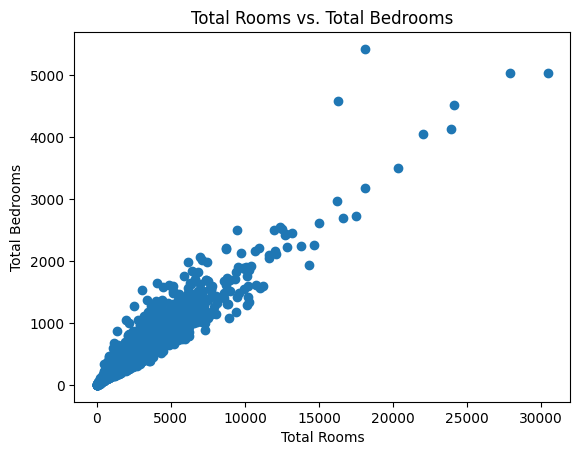

In [19]:
plt.scatter(df["total_rooms"], df["total_bedrooms"])
plt.xlabel("Total Rooms")
plt.ylabel("Total Bedrooms")
plt.title("Total Rooms vs. Total Bedrooms")
plt.show()

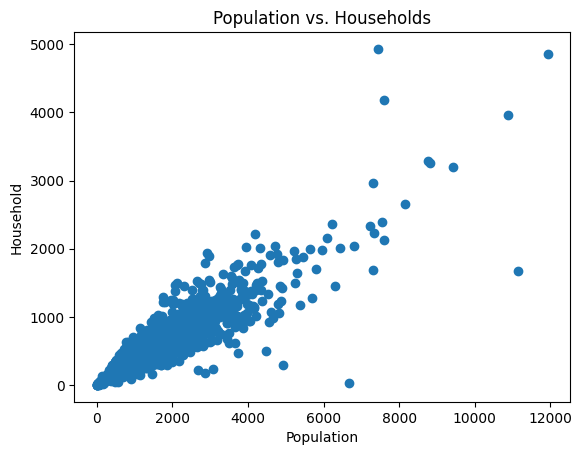

In [21]:
plt.scatter(df["population"], df["households"])
plt.xlabel("Population")
plt.ylabel("Household")
plt.title("Population vs. Households")
plt.show()

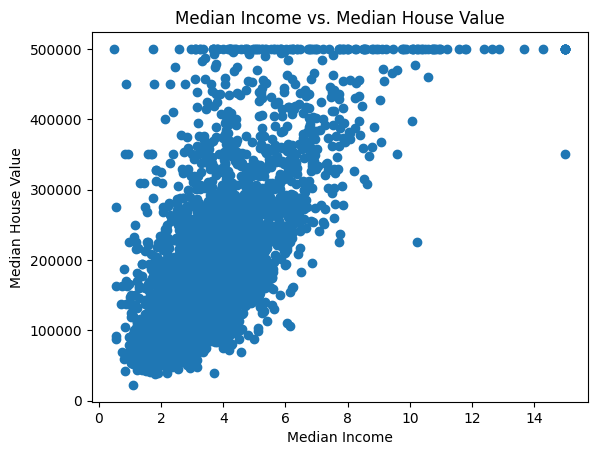

In [22]:
plt.scatter(df["median_income"], df["median_house_value"])
plt.xlabel("Median Income")
plt.ylabel("Median House Value")
plt.title("Median Income vs. Median House Value")
plt.show()

In [27]:
from sklearn.ensemble import RandomForestRegressor
X = df.drop("population", axis = 1)
y = df["population"]

In [28]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2)

In [29]:
Regressor_Model = RandomForestRegressor().fit(X_train,y_train)

In [30]:
y_predicted = Regressor_Model.predict(X_test)

In [31]:
y_predicted[:5]

array([1621.63,  616.03,  370.52,  448.21,  721.85])

In [32]:
np.array(y_test[:5])

array([1582.,  747.,  138.,  397., 3082.])